<a href="https://colab.research.google.com/github/Oyeniran20/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

## Dataset Overview

The dataset is focused on **customer profiling and segmentation**, often used in marketing analytics to understand customer behaviors and preferences. Below is a detailed description of the dataset features:

### **Features Description**

# Dataset Overview

This dataset contains customer information and purchasing behavior data, focusing on demographic, economic, and spending attributes. The columns used for analysis are as follows:

1. **CustomerID**: A unique identifier for each customlts.*

2. **Gender**: Categorical data representing the customer's gender.

3. **Age**: Numerical data indicating the age of the customer.

4. **Annual Income (k$)**: Numerical data representing the annual income of the customer in thousands of dollars.

5. **Spending Score (1-100)**: Numerical data representing the customer's spending score, which may indicate purchasing behavior
## Objective
The goal is to segment customers into meaningful clusters based on their demographic and spending attributes. These clusters will help identify customer personas and inform targeted marketg anr deal-seekers.

---


## Why Use Unsupervised Learning?

Unsupervised learning is suitable for this project because the goal is to uncover hidden patterns or groupings in the data without predefined labels or outcomes. Specifically:

1. **Lack of Labeled Data**:
   - The dataset does not include a target or dependent variable that defines customer segments in advance.
   - We aim to let the data reveal inherent groupings naturally.

2. **Clustering Objective**:
   - The main task involves grouping customers into clusters based on similarities in demographic and spending attributes.
   - Techniques like K-Means, DBSCAN, or Hierarchical Clustering are ideal for such exploratory segmentation tasks.

3. **Exploratory Insights**:
   - The insights generated from clustering (e.g., customer personas such as "high spenders" or "budget-conscious") can guide downstream tasks like marketing or personalized recommendations.
   - This process helps to understand the data structure and relationships withinmentation project.

_______
_______

## Step 1: Data Exploration

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

# load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum().sort_values(ascending=False)

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Outlier count
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum().sort_values(ascending=False)

,0
Annual Income (k$),2
CustomerID,0
Age,0
Spending Score (1-100),0


There are few outliers in Annual Income columns, but we will not apply winsorizing or other methods to them because it may lead to information loss. These outliers could represent distinct clusters.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

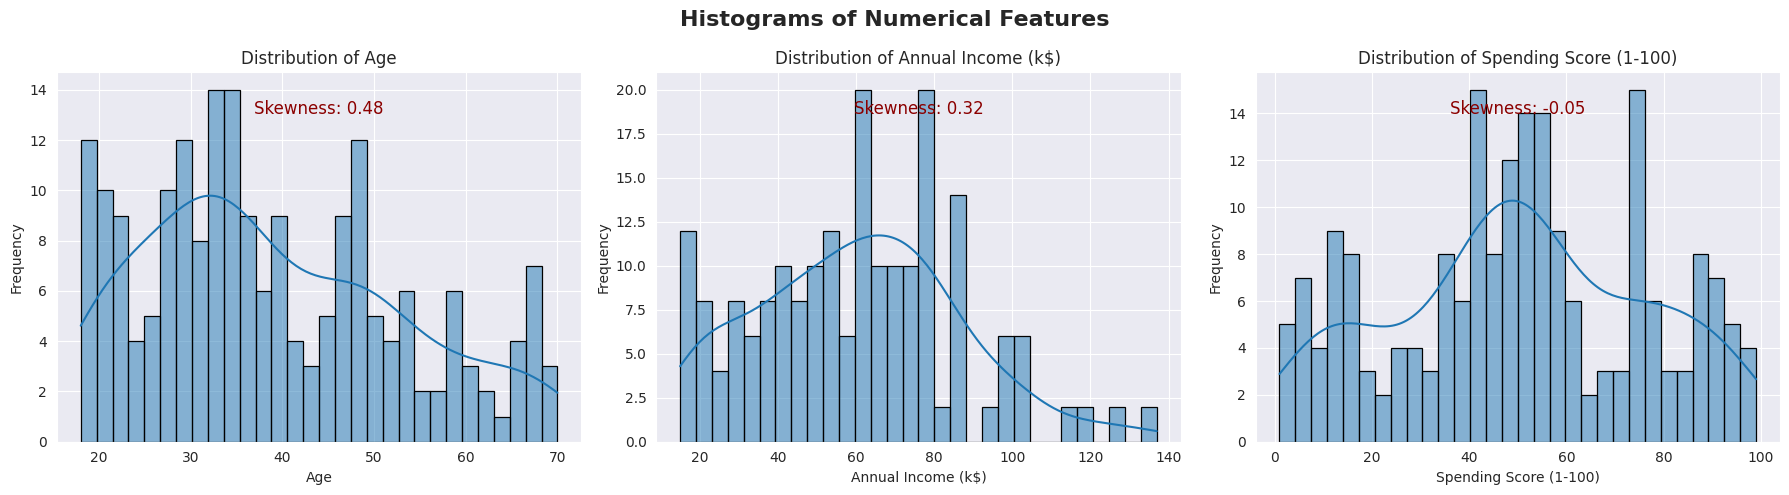

In [11]:
# Histograms to check the distribution of the numerical data
num_col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Set the overall style
sns.set_style("darkgrid")

# Create a figure for histograms
fig, axes = plt.subplots(1, len(num_col), figsize=(18, 5))
fig.suptitle("Histograms of Numerical Features", fontsize=16, fontweight='bold')

for i, column in enumerate(num_col):
    # Calculate skewness
    skewness = skew(df[column])

    sns.histplot(df[column], bins=30, kde=True, ax=axes[i], edgecolor="black")

    # Add skewness score on top
    axes[i].text(0.5, 0.9, f"Skewness: {skewness:.2f}", fontsize=12, color="darkred",
                 ha='center', va='center', transform=axes[i].transAxes)

    axes[i].set_title(f"Distribution of {column}", fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


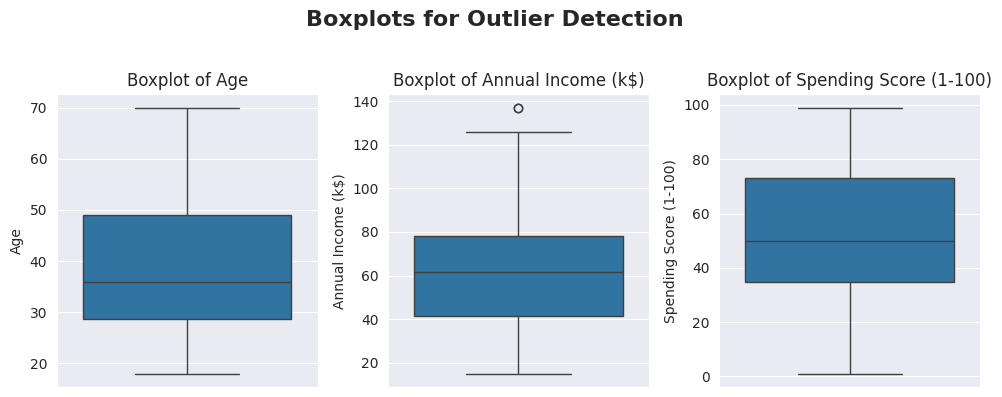

In [12]:
# Create a figure for boxplots
fig, axes = plt.subplots(1, len(num_col), figsize=(10, 4))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16, fontweight='bold')

for i, column in enumerate(num_col):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}", fontsize=12)
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Step 2: Data Preprocessing


In [13]:
# Drop less relevant columns
df = df.drop(columns=['CustomerID'], errors='ignore')

In [14]:
# Apply one hot encoding on 'Gender'
df_new = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Standardize Data
scaler = StandardScaler()
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_new[num_cols] = scaler.fit_transform(df[num_cols])

## Step 3: Exploratory Data Analysis for Clustering

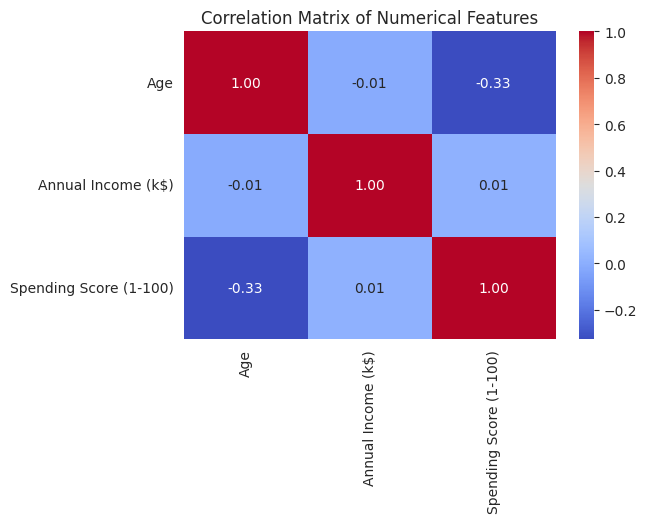

In [19]:
# Compute correlation matrix for numerical features
corr_matrix = df[num_cols].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [20]:
# Variance Inflation Factor (VIF):

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare the data
X = df_new[num_cols]

# Add constant to the model
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                  Feature       VIF
0                   const  1.000000
1                     Age  1.120023
2      Annual Income (k$)  1.000192
3  Spending Score (1-100)  1.119961


Now our dataset is ready to use clustering algorithm model.

## Step 4: Clustering

#### K-Means

In [21]:
from sklearn.cluster import KMeans

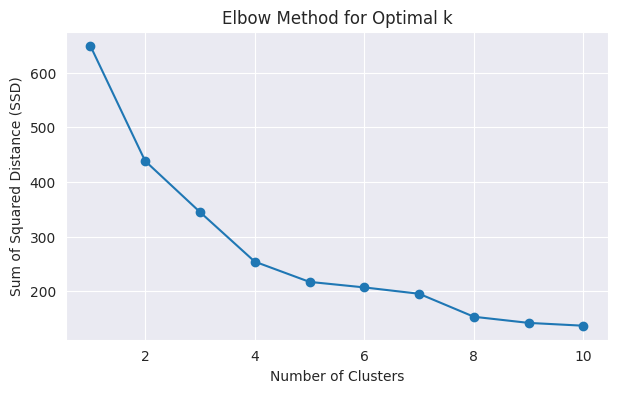

In [22]:
# Determining the optimal number of clusters using Elbow method

# Features used for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
scaled_data =df_new[features]

ssd = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123, init='k-means++')
    kmeans.fit(scaled_data)
    ssd.append(kmeans.inertia_)

# DataFrame
df_elbow = pd.DataFrame({'Clusters': k_values,
                    'Scores': ssd})

# Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(7, 4))
plt.plot(df_elbow['Clusters'], df_elbow['Scores'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance (SSD)')
plt.title('Elbow Method for Optimal k')
plt.show()

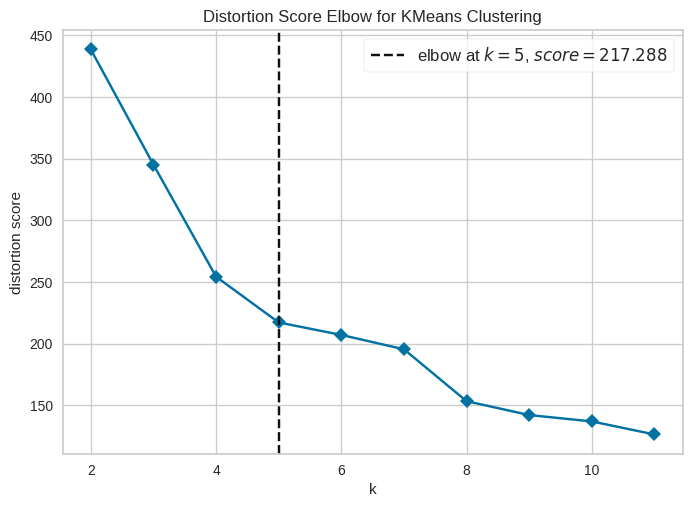

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model
model = KMeans(n_clusters=k, random_state=123, init='k-means++')

# Use KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2, 12), timings=False)

# Fit the visualizer with your data
visualizer.fit(scaled_data)

# Show the elbow plot
visualizer.show()


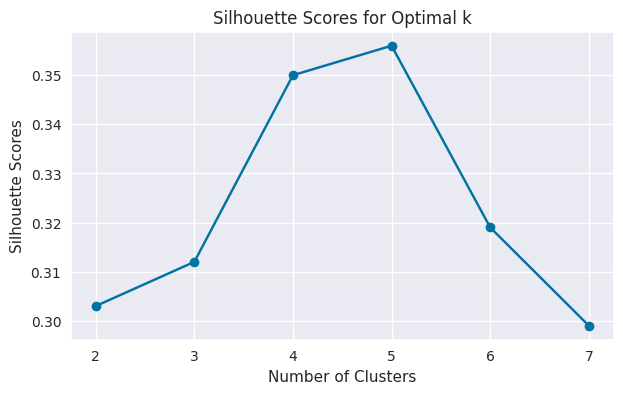

In [24]:
# Silhouette score
from sklearn.metrics import silhouette_score
from sklearn import metrics

sil_scores = []
k_values = range(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123, init='k-means++')
    kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_, metric='euclidean').round(3)
    sil_scores.append(score)

# DataFrame
df_sil = pd.DataFrame({'Clusters': k_values,
                    'Silhouette_Scores': sil_scores})

# Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(7, 4))
plt.plot(df_sil['Clusters'], df_sil['Silhouette_Scores'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for Optimal k')
plt.show()

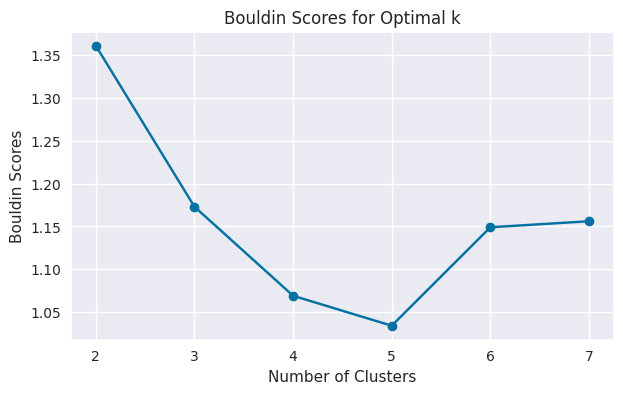

In [25]:
# Davies Bouldin score
from sklearn.metrics import davies_bouldin_score

bouldin_scores = []
k_values = range(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123, init='k-means++')
    kmeans.fit(scaled_data)
    score = davies_bouldin_score(scaled_data, kmeans.labels_).round(3)
    bouldin_scores.append(score)

# DataFrame
df_bou = pd.DataFrame({'Clusters': k_values,
                    'Bouldin_Scores': bouldin_scores})

# Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(7, 4))
plt.plot(df_bou['Clusters'], df_bou['Bouldin_Scores'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Bouldin Scores')
plt.title('Bouldin Scores for Optimal k')
plt.show()

### Selection of $k=5$ as the Optimal Number of Clusters

The **Elbow Method** plot demonstrates a clear bend at $k=5$, indicating a significant reduction in the distortion score up to this point, with diminishing improvements beyond it. Specifically, at $k=5$, the distortion score is $15,748.082$, signifying an optimal trade-off between minimizing within-cluster variance and maintaining simplicity in cluster structure.

Moreover, other evaluation metrics further support this choice. The **Silhouette Score** achieves its highest value of $0.230$ at $k=5$, highlighting strong cluster separation and cohesion. Similarly, the **Davies-Bouldin Index**, which evaluates the compactness and separation of clusters, is lowest at $1.536$ for $k=5$, confirming the quality of this configuration.

Considering these results, $k=5$ was selected as the optimal number of clusters. This choice balances interpretability, performance, and practical clustering quality, ensuring meaningful segmentation in the daaset.
ty.


##### Run K-Means with the optimal k

In [26]:
k=5
kmeans = KMeans(n_clusters=k, random_state=123, init='k-means++')
kmeans.fit(scaled_data)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

### 2D PCA Plot

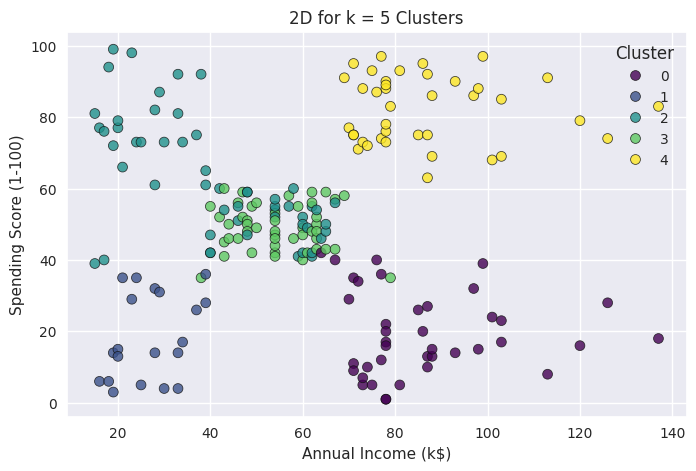

In [27]:

# Plotting 2D PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data=df, hue=labels, palette='viridis', s=50, edgecolor='k', alpha=0.8)
plt.title(f'2D for k = {k} Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='upper right')
plt.show()


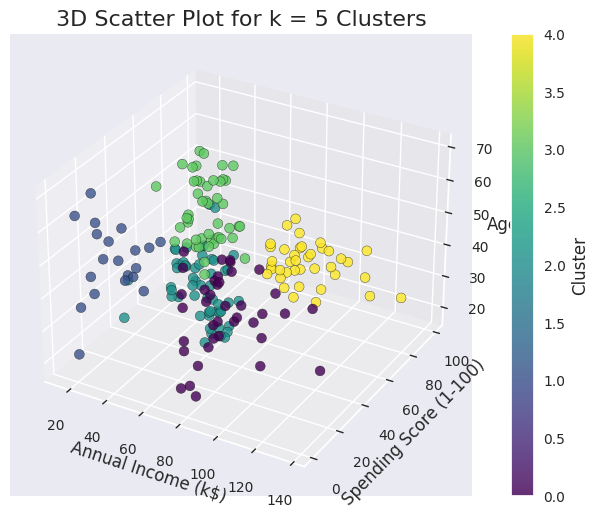

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D space
scatter = ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'],
                     c=labels, cmap='viridis', s=50, edgecolor='k', alpha=0.8)

# Adding title and labels
ax.set_title(f'3D Scatter Plot for k = {k} Clusters', fontsize=16)
ax.set_xlabel('Annual Income (k$)', fontsize=12)
ax.set_ylabel('Spending Score (1-100)', fontsize=12)
ax.set_zlabel('Age', fontsize=12)

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)

# Show the plot
plt.show()

### 3D PCA Plot

In [30]:
from sklearn.decomposition import PCA

In [31]:
# Perform PCA with 3 components (3D plot)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(scaled_data)

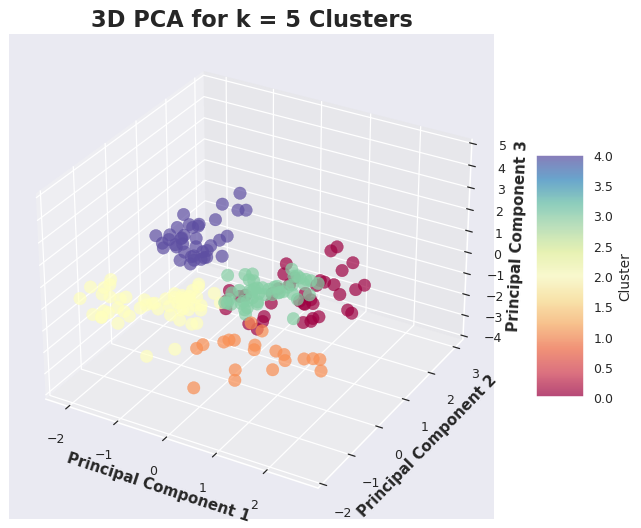

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Plotting 3D PCA with enhanced aesthetics
fig = plt.figure(figsize=(12, 7), dpi=90, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D PCA with transparency (alpha) and adjusted point size (s)
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=labels, cmap='Spectral', s=100, alpha=0.7)

# Title and labels with increased font size and bold styling
ax.set_title(f'3D PCA for k = {k} Clusters', fontsize=18, fontweight='bold')
ax.set_xlabel('Principal Component 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Principal Component 2', fontsize=12, fontweight='bold')
ax.set_zlabel('Principal Component 3', fontsize=12, fontweight='bold')

# Set axis limits to focus on the relevant part of the plot
ax.set_zlim([-4, 5])

# Add color bar for cluster visualization
fig.colorbar(scatter, ax=ax, label='Cluster', shrink=0.5, aspect=5)

# Show the plot
plt.show()


## Mini Batch Kmeans

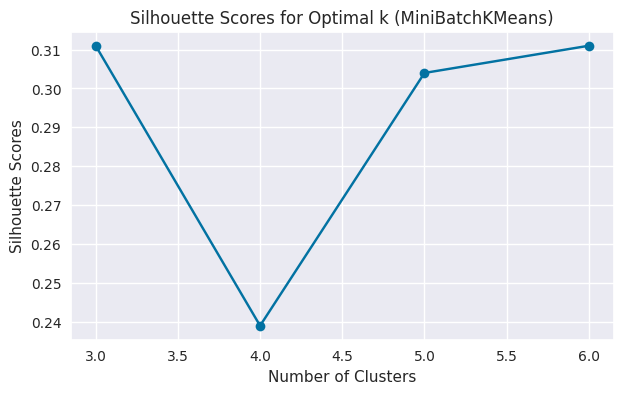

In [33]:
from sklearn.cluster import MiniBatchKMeans

# Silhouette score for MiniBatchKMeans
sil_scores = []
k_values = range(3, 7)

# Loop over the range of k-values
for k in k_values:
    # Initialize MiniBatchKMeans with k clusters
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=123, init='k-means++', batch_size=10000)

    # Fit the model and predict cluster labels
    mini_batch_kmeans.fit_predict(scaled_data)

    # Calculate the silhouette score
    score = silhouette_score(scaled_data, mini_batch_kmeans.labels_, metric='euclidean').round(3)
    sil_scores.append(score)

# DataFrame for silhouette scores
df_sil = pd.DataFrame({'Clusters': k_values, 'Silhouette_Scores': sil_scores})

# Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(7, 4))
plt.plot(df_sil['Clusters'], df_sil['Silhouette_Scores'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for Optimal k (MiniBatchKMeans)')
plt.show()

In [34]:
df_sil

,Clusters,Silhouette_Scores
0,3,0.311
1,4,0.239
2,5,0.304
3,6,0.311


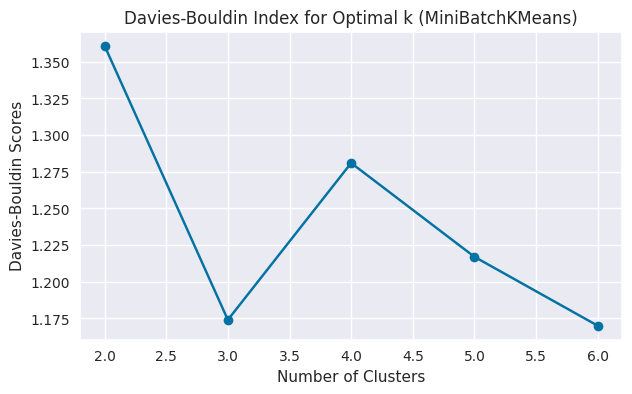

In [35]:
# Davies-Bouldin index for MiniBatchKMeans
db_scores = []
k_values = range(2, 7)

# Loop over the range of k-values
for k in k_values:
    # Initialize MiniBatchKMeans with a larger batch_size
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=123, init='k-means++', batch_size=10000)

    # Fit the model and predict cluster labels
    labels = mini_batch_kmeans.fit_predict(scaled_data)

    # Calculate the Davies-Bouldin index
    db_index = davies_bouldin_score(scaled_data, labels).round(3)
    db_scores.append(db_index)

# DataFrame for Davies-Bouldin index scores
df_db = pd.DataFrame({'Clusters': k_values, 'Davies_Bouldin_Scores': db_scores})

# Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(7, 4))
plt.plot(df_db['Clusters'], df_db['Davies_Bouldin_Scores'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Scores')
plt.title('Davies-Bouldin Index for Optimal k (MiniBatchKMeans)')
plt.show()

In [36]:
df_db

,Clusters,Davies_Bouldin_Scores
0,2,1.361
1,3,1.174
2,4,1.281
3,5,1.217
4,6,1.170


### Hierarchical Clustering

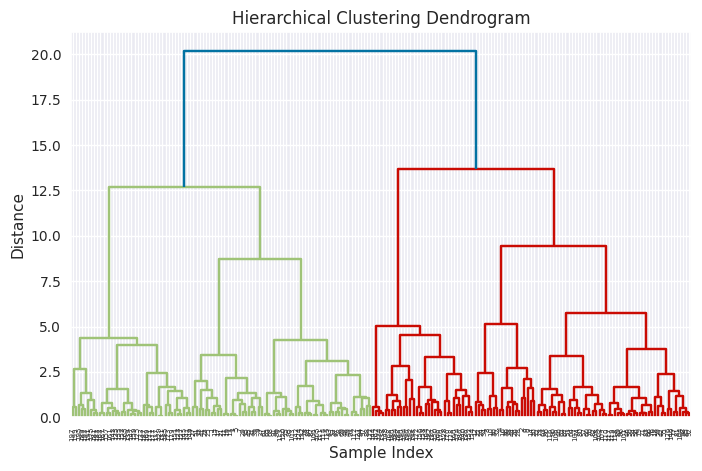

In [37]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical/agglomerative clustering (Linkage method)
Z = sch.linkage(scaled_data, method='ward')
# Plot the dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [38]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Initialize an empty list to store the results
results = []

# Iterate through k values from 4 to 6
for k in range(4, 7):
    # Apply Agglomerative Clustering
    agg_clust = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_agg = agg_clust.fit_predict(scaled_data)

    # Silhouette Score
    sil_score = silhouette_score(scaled_data, labels_agg, metric='euclidean')

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(scaled_data, labels_agg)

    # Append the results to the list
    results.append([k, sil_score, db_score])

# Convert the results into a DataFrame
score_table = pd.DataFrame(results, columns=['k', 'Silhouette Score', 'Davies-Bouldin Index'])

# Display the table
score_table


,k,Silhouette Score,Davies-Bouldin Index
0,4,0.329905,1.114677
1,5,0.347756,1.068573
2,6,0.350444,1.008615


In [39]:
# Features used for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaled_data =df_new[features]

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Function to apply DBSCAN and evaluate performance
def apply_dbscan(epsilon, min_samples):
    # Apply DBSCAN
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels_dbscan = dbscan.fit_predict(scaled_data)

    # DBSCAN might create noise (-1) points, so we will ignore those for evaluation
    if len(np.unique(labels_dbscan)) > 1:  # Avoid silhouette calculation if there's only noise
        # Silhouette Score (ignores noise points)
        sil_score = silhouette_score(scaled_data, labels_dbscan)
    else:
        sil_score = -1  # Negative score if only noise

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(scaled_data, labels_dbscan)

    return sil_score, db_score, labels_dbscan

# Testing different epsilon and min_samples values
epsilon_values = [0.3, 0.4, 0.5]
min_samples_values = [4, 5, 6]

# Initialize an empty list to store the results
results = []

# Iterate through combinations of epsilon and min_samples
for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        sil_score, db_score, labels_dbscan = apply_dbscan(epsilon, min_samples)
        results.append([epsilon, min_samples, sil_score, db_score])

# Convert the results into a DataFrame
dbscan_results = pd.DataFrame(results, columns=['Epsilon', 'Min Samples', 'Silhouette Score', 'Davies-Bouldin Index'])

# Display the results
print(dbscan_results)


   Epsilon  Min Samples  Silhouette Score  Davies-Bouldin Index
0      0.3            4         -0.079613              1.545116
1      0.3            5         -0.182246              1.502314
2      0.3            6         -0.282289              1.867384
3      0.4            4          0.113110              1.656364
4      0.4            5          0.075988              1.575770
5      0.4            6          0.023144              1.570253
6      0.5            4          0.112211              2.026392
7      0.5            5          0.184514              1.756946
8      0.5            6          0.207328              1.723430


In [41]:
import numpy as np

# Get the unique labels from DBSCAN
unique_labels = np.unique(labels_dbscan)

# Count the number of clusters (excluding noise label -1)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"Number of clusters formed: {num_clusters}")

Number of clusters formed: 5


In [42]:
unique_labels

array([-1,  0,  1,  2,  3,  4])